In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import os
import datetime
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f
from torch.utils.data import Dataset, DataLoader

/home/trung/anaconda3/envs/fast_depth/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
df = pd.read_csv('mitbih_train.csv', header = None)

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [13]:
df.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [14]:
df.rename(columns = {187: 'classes'}, inplace = True)

In [15]:
pd.unique(df['classes'])
df['classes'] = df['classes'].astype(int)

<AxesSubplot:>

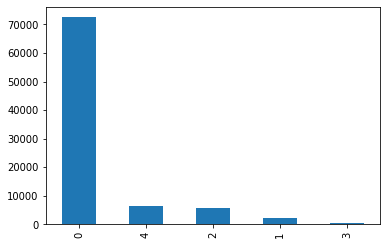

In [16]:
df['classes'].value_counts().plot(kind = 'bar')

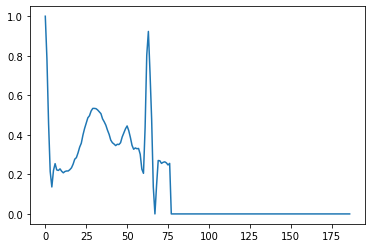

In [17]:
plt.plot(df.iloc[100, :-1])

<AxesSubplot:>

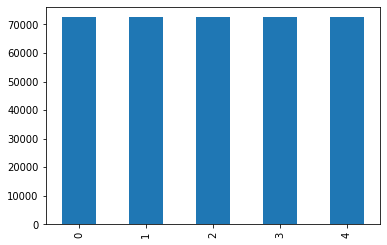

In [18]:
smote = SMOTE(random_state = 42)
X = df.drop('classes', axis = 1)
y = df['classes']
X_sm, y_sm = smote.fit_resample(X, y)
df_sm = pd.concat([X_sm, y_sm], axis = 1)
df_sm = df_sm.reset_index()
df_sm.drop(['index'], axis = 1, inplace=True)
df_sm['classes'].value_counts().plot(kind = 'bar')

In [19]:
df_sm

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,classes
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362350,0.734129,0.616127,0.485778,0.351101,0.190840,0.089054,0.032269,0.009664,0.031527,0.071370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
362351,0.801753,0.541161,0.500729,0.487252,0.461045,0.445255,0.391488,0.333737,0.260162,0.150138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
362352,0.973720,0.925187,0.873577,0.801348,0.707915,0.592022,0.471505,0.376119,0.301465,0.228963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
362353,0.735002,0.634742,0.531005,0.417347,0.320142,0.193078,0.117065,0.064134,0.045439,0.044225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


<AxesSubplot:>

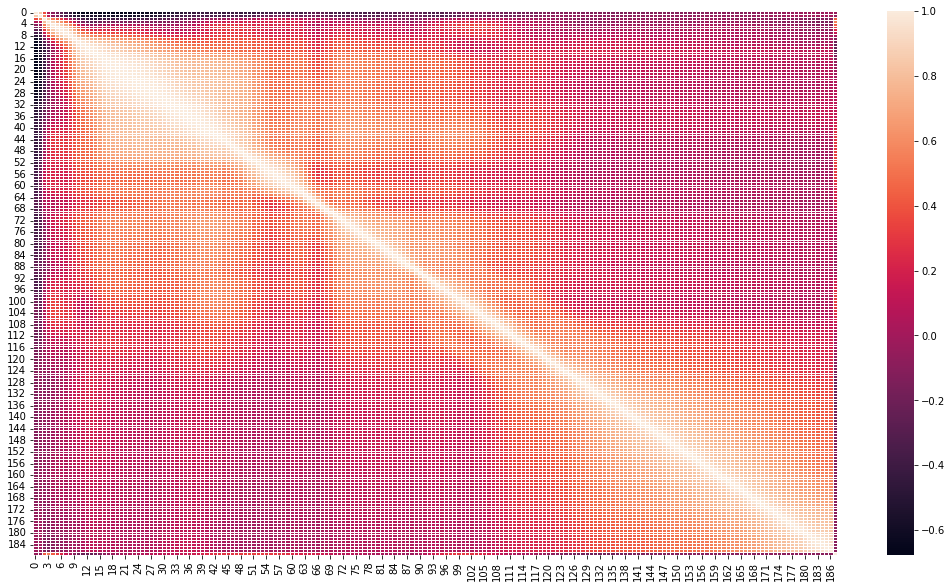

In [20]:
df_sm_corr = df_sm.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(df_sm_corr, annot=False, linewidths=0.5, fmt= ".2f")

In [21]:
# model = RandomForestClassifier(max_features=12, max_depth=6)
# model.fit(X_sm, y_sm)
# predict = model.predict(X_test)
# print(accuracy_score(y_test, predict))

In [22]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.encode = nn.Sequential(nn.Conv1d(1, 32, 3, padding = 1),
                    nn.MaxPool1d(2),
                    nn.ReLU(),
                    nn.Conv1d(32, 64, 3, padding = 1),
                    nn.MaxPool1d(2),
                    nn.ReLU())
        self.fc = nn.Sequential(nn.Linear(64 * 46, 128),
                                nn.ReLU(),
                                nn.Linear(128, 64),
                                nn.ReLU(),
                                nn.Linear(64, 5),
                                )

    def forward(self, x):
        out = self.encode(x)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [23]:
model = ConvNet()
x = torch.rand((10, 1, 187))
print(model(x).shape)

torch.Size([10, 5])


In [24]:
class CustomDataset(Dataset):
    def __init__(self, df):
        self.df = df
    
    def __getitem__(self, index):
        X = self.df.iloc[index, :-1]
        y = self.df.iloc[index, -1]
        return X.to_numpy(), y
    
    def __len__(self):
        return len(self.df[0])

In [25]:
loss_fn = nn.CrossEntropyLoss()
lr = 0.001
batch_size = 8
optim_fn = torch.optim.Adam(model.parameters(), lr = lr)
train_df = df_sm
test_df = pd.read_csv('mitbih_test.csv', header = None)
train_dataset = CustomDataset(train_df)
test_dataset = CustomDataset(test_df)
train_loader = DataLoader(train_dataset, batch_size, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size, shuffle = False)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loss_fn.to(device)
model.to(device)

ConvNet(
  (encode): Sequential(
    (0): Conv1d(1, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=2944, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=5, bias=True)
  )
)

In [27]:
save_path = 'save/'
n_epochs = 20
if not os.path.exists(save_path):
    os.makedirs(save_path)
max_acc = 0
for epoch in range(1, n_epochs + 1):
    model.train()
    print(f"Epoch {epoch}")
    train_losses = []

    for X, y in tqdm(train_loader, desc = 'Training'):
        X = X.to(device).unsqueeze(1).float()
        y = y.to(device).long()
        optim_fn.zero_grad()
        
        out = model(X)
        train_loss = loss_fn(out, y)

        train_loss.backward()
        optim_fn.step()
        train_losses.append(train_loss)
    mean_train_loss = sum(train_losses)/len(train_losses)

    torch.save(model.state_dict(), os.path.join(save_path, "last_ckpt.pt"))
    print(f'Train loss: {mean_train_loss}')
    print('=' * 50)

    if epoch == 1 or epoch % 5 == 0:
        correct = 0
        model.eval()
        for X, y in tqdm(test_loader, desc = 'Validating'):
            X = X.to(device)
            y = y.to(device)
            with torch.no_grad():
                out = model(X)
                pred_label = torch.argmax(out, dim = 1)
                correct += torch.sum(pred_label == y).item()
            acc = correct / len(test_dataset)
            if acc > max_acc:
                torch.save(model.state_dict(), os.path.join(save_path, "best_ckpt.pt"))
            print(f'Accuracy: {acc}')

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ConvNet()
model.load_state_dict(torch.load('last_ckpt.pt', map_location = device))
model.eval()
y_pred = []
with torch.no_grad():
    correct = 0
    for X, y in tqdm(test_loader, desc = 'Validating'):
        X = X.to(device).unsqueeze(1).float()
        y = y.to(device).float()
        with torch.no_grad():
            out = model(X)
            pred_label = torch.argmax(out, dim = 1)
            y_pred.extend(pred_label.tolist())
            correct += torch.sum(pred_label == y).item()
    acc = correct / len(test_dataset)
    # if acc > max_acc:
        # torch.save(net.state_dict(), os.path.join(save_path, "best_ckpt.pt"))
    print(f'Accuracy: {acc}')

Validating:   0%|          | 0/2737 [00:00<?, ?it/s]

Validating: 100%|██████████| 2737/2737 [00:18<00:00, 145.05it/s]

Accuracy: 0.9814087337840307


In [43]:
y_test = list(map(int, test_df[187].tolist()))

In [45]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[17939   103    37    23    16]
 [   94   450     8     1     3]
 [   43     4  1381    15     5]
 [   15     2    14   131     0]
 [   20     1     3     0  1584]]


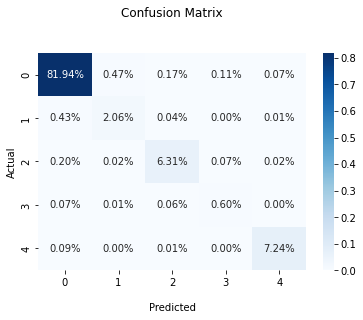

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(list(range(5)))
ax.yaxis.set_ticklabels(list(range(5)))

## Display the visualization of the Confusion Matrix.
plt.show()